In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
# I get the data per minute, the goal is to check how the price change in the first minutes of days with high volatility)

x_m= get_pricing('CCL', start_date='2020-01-01',end_date='2020-07-08', frequency='minute')

# I get the daily data to select which days had hihg volatility

x_d= get_pricing('CCL', start_date='2020-01-01',end_date='2020-07-08', frequency='daily')

In [11]:
# This represent the perecentage difference of the price of the stock between the close of the previous day,
# and the open price of the current day

x_d['overnight change']=(x_d['open_price']- x_d['close_price'].shift(1))/x_d['close_price'].shift(1)

# This represent the perecentage difference of the price of the stock between the close,
# and the open price of the previous day

x_d['previous_day_change']=(x_d['close_price'].shift(1)-x_d['open_price'].shift(1))/x_d['open_price'].shift(1)

# This is the exponential weight average of the open price of the current day with a window of 20 days 

x_d['open EWMA 20 days'] = x_d['open_price'].ewm(span=20).mean()

In [12]:
high_volatility=x_d[abs(x_d['previous_day_change'])>=0.05]

len(high_volatility)

40

In [13]:
# Here I made a dictionary with the different dates that I want to plot

table={}
i=-1

for x in high_volatility.index.date:
    i=i+1
    table[i]=x.strftime('%Y-%m-%d')

In [14]:
# Here I made a dictionary in which each key is a full data frame of a day
# whith each data frame I can plot what I need

imp_dates={}

for item in table.values():
    imp_dates[item]=x_m['open_price'][item]

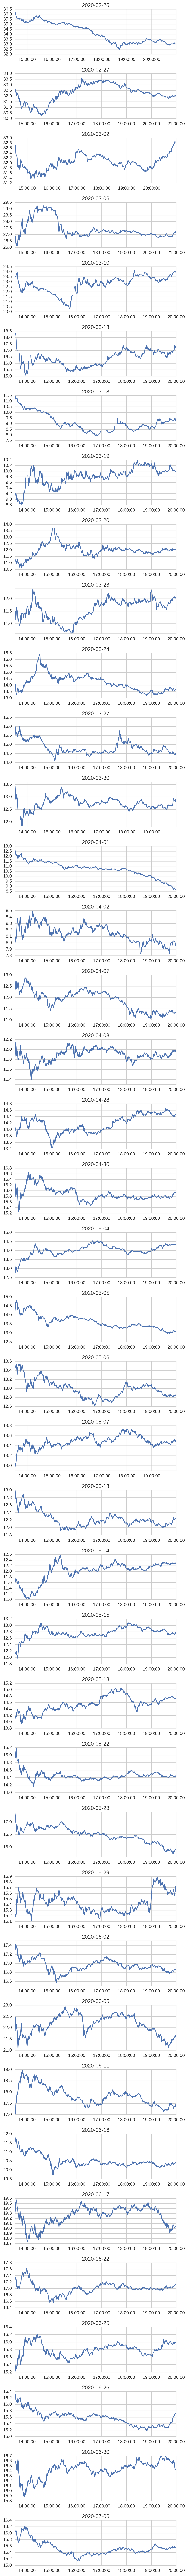

In [15]:
# In this way I can print one picture per each data frame in the dictionary
# The order depend in the dictionary order.


fig_1, axes = plt.subplots(nrows=len(imp_dates.keys()), ncols=1, figsize=(6,80), dpi=300)

fig_dic={}
i=-1

for item in sorted(imp_dates.keys()):
    i=i+1
    axes[i].plot(imp_dates[item])
    axes[i].set_title(item)
    
plt.tight_layout()

In [16]:
high_volatility

open_price    high     low  close_price  \
2020-02-26 00:00:00+00:00      36.170  36.190  32.380       33.170   
2020-02-27 00:00:00+00:00      32.650  33.700  30.190       31.850   
2020-03-02 00:00:00+00:00      32.710  32.940  31.245       32.930   
2020-03-06 00:00:00+00:00      26.910  29.298  26.100       27.140   
2020-03-10 00:00:00+00:00      23.510  24.180  20.195       24.018   
2020-03-13 00:00:00+00:00      18.340  18.460  15.010       17.580   
2020-03-18 00:00:00+00:00      11.160  11.550   7.900        9.290   
2020-03-19 00:00:00+00:00       9.130  10.400   8.600        9.990   
2020-03-20 00:00:00+00:00      11.090  13.810  10.600       11.990   
2020-03-23 00:00:00+00:00      11.270  12.450  10.610       12.005   
2020-03-24 00:00:00+00:00      14.060  16.680  13.100       13.670   
2020-03-27 00:00:00+00:00      16.000  16.160  14.050       14.410   
2020-03-30 00:00:00+00:00      13.440  13.470  11.710       12.819   
2020-04-01 00:00:00+00:00      12.600  12.610   8.610        8.800   
2020-04-02 00:00:00+00:00       8.005   8.530   7.800        7.970   
2020-04-07 00:00:00+00:00      12.350  12.950  11.050       11.280   
2020-04-08 00:00:00+00:00      11.860  12.190  11.360       11.980   
2020-04-28 00:00:00+00:00      13.960  14.666  13.365       14.450   
2020-04-30 00:00:00+00:00      16.260  16.690  15.180       15.890   
2020-05-04 00:00:00+00:00      13.120  14.580  12.750       14.330   
2020-05-05 00:00:00+00:00      14.250  14.890  12.930       13.090   
2020-05-06 00:00:00+00:00      13.510  13.590  12.580       12.828   
2020-05-07 00:00:00+00:00      12.980  13.740  12.980       13.510   
2020-05-13 00:00:00+00:00      13.000  13.010  11.890       12.260   
2020-05-14 00:00:00+00:00      11.670  12.620  11.000       12.268   
2020-05-15 00:00:00+00:00      12.130  13.100  11.950       12.770   
2020-05-18 00:00:00+00:00      14.100  15.070  13.920       14.720   
2020-05-22 00:00:00+00:00      14.920  15.180  14.150       14.455   
2020-05-28 00:00:00+00:00      17.340  17.400  15.735       15.930   
2020-05-29 00:00:00+00:00      15.230  15.920  15.000       15.750   
2020-06-02 00:00:00+00:00      17.330  17.480  16.560       16.870   
2020-06-05 00:00:00+00:00      22.300  22.940  21.055       21.500   
2020-06-11 00:00:00+00:00      17.290  18.990  16.750       17.440   
2020-06-16 00:00:00+00:00      21.815  21.850  19.607       20.428   
2020-06-17 00:00:00+00:00      19.320  19.800  18.670       19.090   
2020-06-22 00:00:00+00:00      17.360  17.650  16.540       17.260   
2020-06-25 00:00:00+00:00      15.220  16.240  15.110       16.000   
2020-06-26 00:00:00+00:00      16.210  16.350  15.160       15.840   
2020-06-30 00:00:00+00:00      16.550  16.710  15.850       16.400   
2020-07-06 00:00:00+00:00      16.040  16.220  15.110       15.610   

                                volume   price  overnight change  \
2020-02-26 00:00:00+00:00   20278829.0  33.170          0.009348   
2020-02-27 00:00:00+00:00   27861405.0  31.850         -0.015677   
2020-03-02 00:00:00+00:00   14877834.0  32.930         -0.016980   
2020-03-06 00:00:00+00:00   26189215.0  27.140         -0.034446   
2020-03-10 00:00:00+00:00   41090358.0  24.018          0.081666   
2020-03-13 00:00:00+00:00   48696185.0  17.580          0.225690   
2020-03-18 00:00:00+00:00   63911592.0   9.290         -0.121951   
2020-03-19 00:00:00+00:00   47564634.0   9.990         -0.017223   
2020-03-20 00:00:00+00:00   69326518.0  11.990          0.110110   
2020-03-23 00:00:00+00:00   46676839.0  12.005         -0.060050   
2020-03-24 00:00:00+00:00   58844765.0  13.670          0.171179   
2020-03-27 00:00:00+00:00   57155256.0  14.410         -0.101628   
2020-03-30 00:00:00+00:00   41113467.0  12.819         -0.067314   
2020-04-01 00:00:00+00:00  163346537.0   8.800         -0.041825   
2020-04-02 00:00:00+00:00  178700048.0   7.970         -0.090341   
2020-04-07 00:00:00+00:00  156812710.0  11.280          0.210784   
